# Chicago Crime Analysis

Place the CSV file `Crimes_-_2001_to_Present.csv` in the same folder as this notebook and run the big code cell below.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
csv_path = os.path.join(os.path.dirname(__file__) if '__file__' in globals() else '.', 'Crimes_-_2001_to_Present.csv')
if not os.path.exists(csv_path):
    csv_path = 'Crimes_-_2001_to_Present.csv'

print('Loading CSV from:', csv_path)

# Read CSV (expects a Date column)
df = pd.read_csv(csv_path, parse_dates=['Date'], infer_datetime_format=True, low_memory=False)

if 'Date' not in df.columns:
    raise RuntimeError('CSV must contain a Date column')

# Basic datetime convenience columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

plt.style.use('default')

def show():
    plt.tight_layout()
    plt.show()

print('Setup complete. Run the next cells (Task 1 ... Task 10) in order.')

Loading CSV from: .\Crimes_-_2001_to_Present.csv


C:\Users\Oluwaseyi\AppData\Local\Temp\ipykernel_19820\3495601750.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(csv_path, parse_dates=['Date'], infer_datetime_format=True, low_memory=False)
C:\Users\Oluwaseyi\AppData\Local\Temp\ipykernel_19820\3495601750.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path, parse_dates=['Date'], infer_datetime_format=True, low_memory=False)


Setup complete. Run the next cells (Task 1 ... Task 10) in order.


C:\Users\Oluwaseyi\AppData\Local\Temp\ipykernel_19820\1716987311.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Date').resample('M').size()


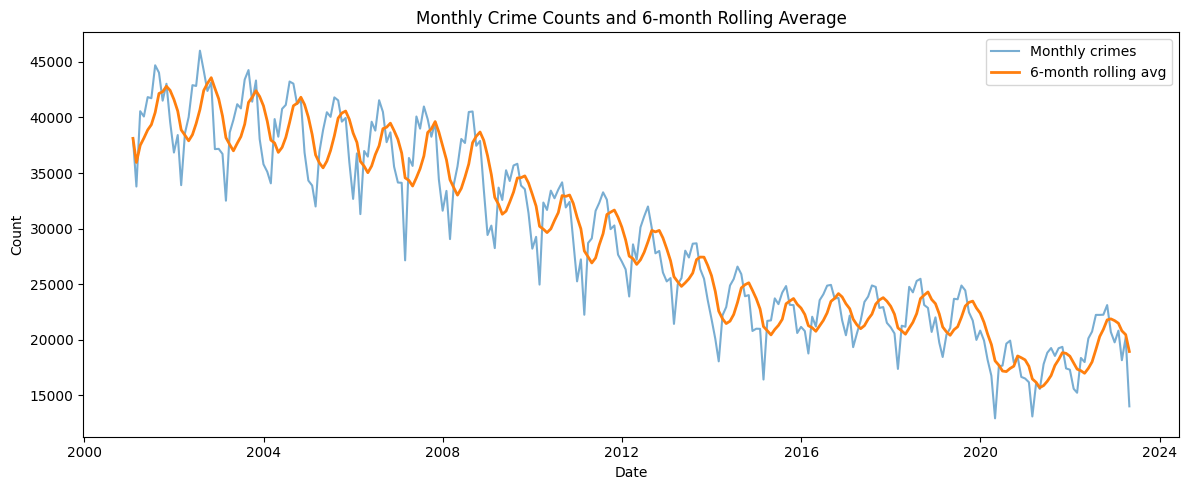

In [3]:
# Task 1: Crime Trend Over Time (Monthly counts + 6-month rolling average)
monthly = df.set_index('Date').resample('M').size()
rolling6 = monthly.rolling(window=6, min_periods=1).mean()
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, label='Monthly crimes', color='C0', alpha=0.6)
plt.plot(rolling6.index, rolling6.values, label='6-month rolling avg', color='C1', linewidth=2)
plt.title('Monthly Crime Counts and 6-month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
show()

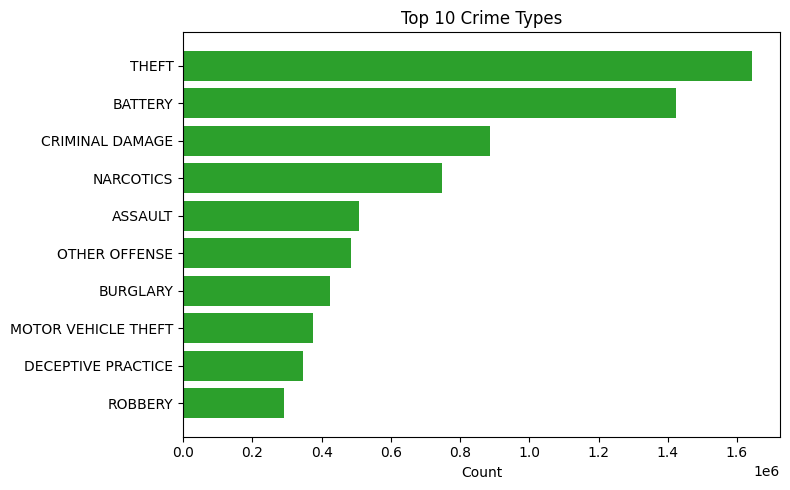

In [16]:
# Task 2: Top 10 Crime Types (Horizontal bar)

top10 = df['Primary Type'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,5))
plt.barh(top10.index, top10.values, color='C2')
plt.title('Top 10 Crime Types')
plt.xlabel('Count')
show()


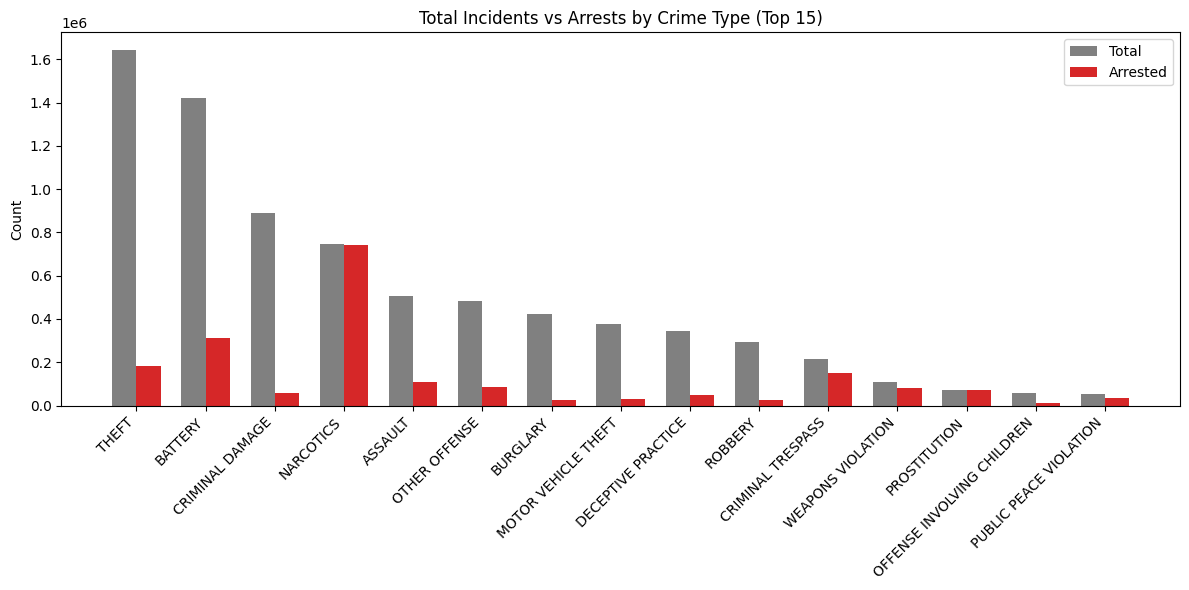

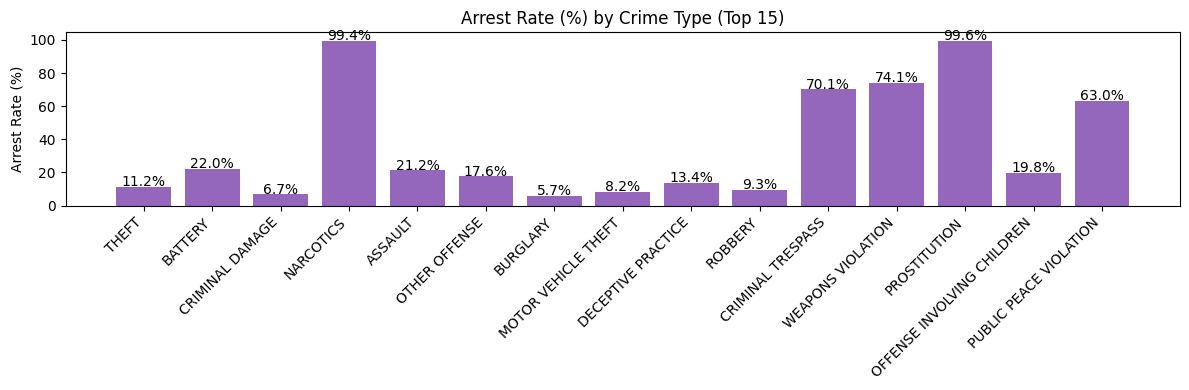

In [17]:
# Task 3: Arrest Rate by Crime Type (Grouped bar + percent)
grp = df.groupby('Primary Type').agg(total=('Primary Type','count'), arrested=('Arrest','sum'))
grp['arrest_rate'] = 100 * grp['arrested'] / grp['total']
top15 = grp.sort_values('total', ascending=False).head(15)
ind = np.arange(len(top15))
width = 0.35
plt.figure(figsize=(12,6))
plt.bar(ind - width/2, top15['total'], width, label='Total', color='gray')
plt.bar(ind + width/2, top15['arrested'], width, label='Arrested', color='C3')
plt.xticks(ind, top15.index, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Total Incidents vs Arrests by Crime Type (Top 15)')
plt.legend()
show()

plt.figure(figsize=(12,4))
plt.bar(top15.index, top15['arrest_rate'], color='C4')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rate (%) by Crime Type (Top 15)')
for i,v in enumerate(top15['arrest_rate']):
    plt.text(i, v+0.5, f'{v:.1f}%', ha='center')
show()

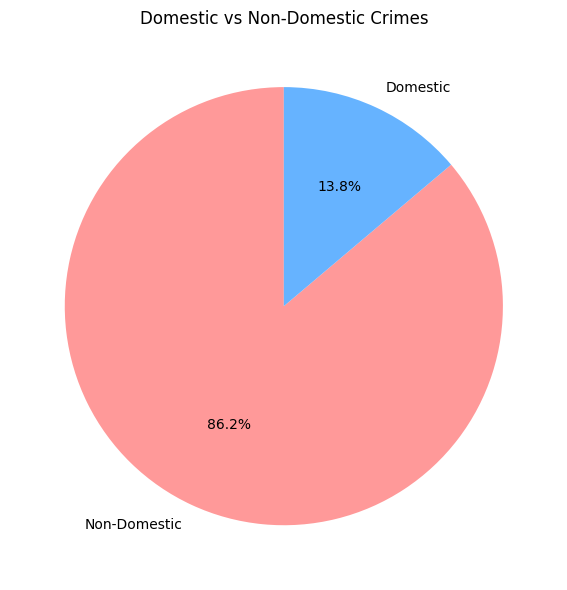

In [ ]:
# Task 4: Domestic vs Non-Domestic (Pie)

dom_counts = df['Domestic'].fillna(False).astype(bool).value_counts()
labels = ['Domestic' if x==True else 'Non-Domestic' for x in dom_counts.index]
plt.figure(figsize=(6,6))
plt.pie(dom_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Domestic vs Non-Domestic Crimes')
show()

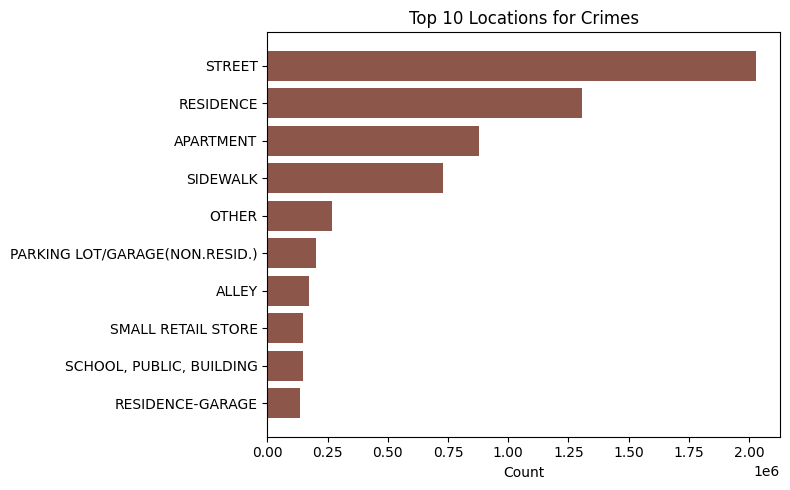

In [ ]:
# Task 5: Crime by Location Type (Top 10)
locs = df['Location Description'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,5))
plt.barh(locs.index, locs.values, color='C5')
plt.title('Top 10 Locations for Crimes')
plt.xlabel('Count')
show()

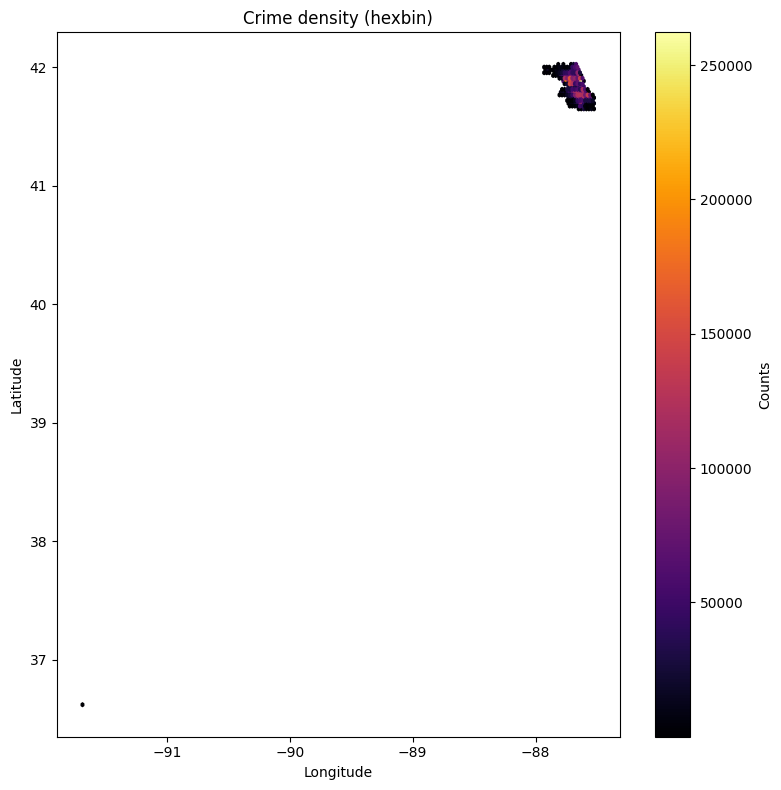

In [ ]:
# Task 6: Crime Hotspots (hexbin)
latlon = df.dropna(subset=['Latitude','Longitude'])
if len(latlon) > 0:
    plt.figure(figsize=(8,8))
    plt.hexbin(latlon['Longitude'], latlon['Latitude'], gridsize=200, cmap='inferno', mincnt=1)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Crime density (hexbin)')
    plt.colorbar(label='Counts')
    show()

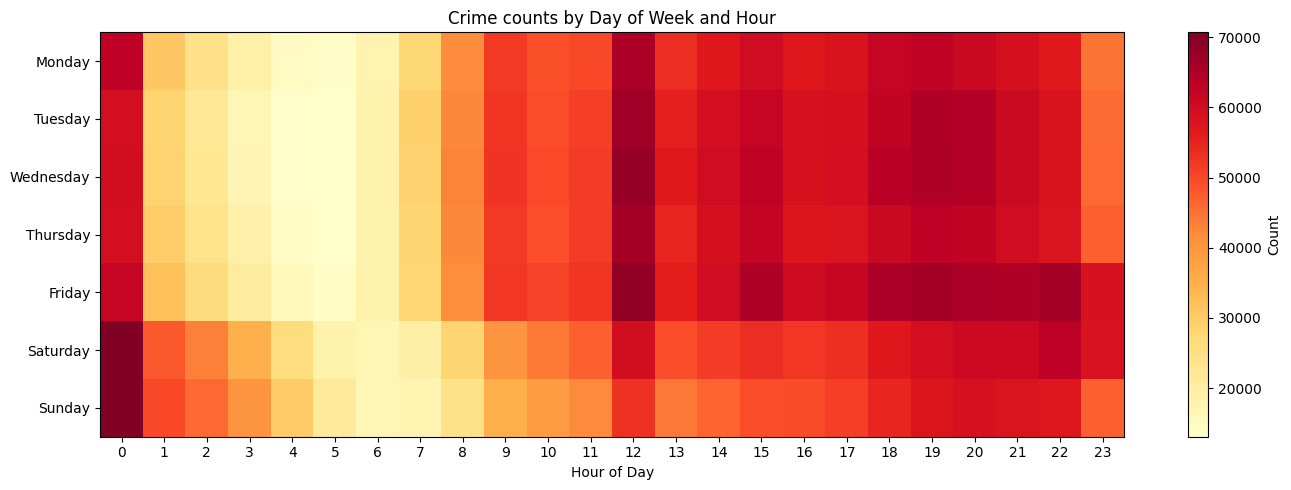

In [19]:
# Task 7: Crimes by Hour of Day (Day of week x Hour heatmap)

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = df.groupby(['DayOfWeek','Hour']).size().unstack(fill_value=0).reindex(order)
plt.figure(figsize=(14,5))
plt.imshow(pivot, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Count')
plt.yticks(np.arange(len(pivot.index)), pivot.index)
plt.xticks(np.arange(0,24), np.arange(0,24))
plt.xlabel('Hour of Day')
plt.title('Crime counts by Day of Week and Hour')
show()


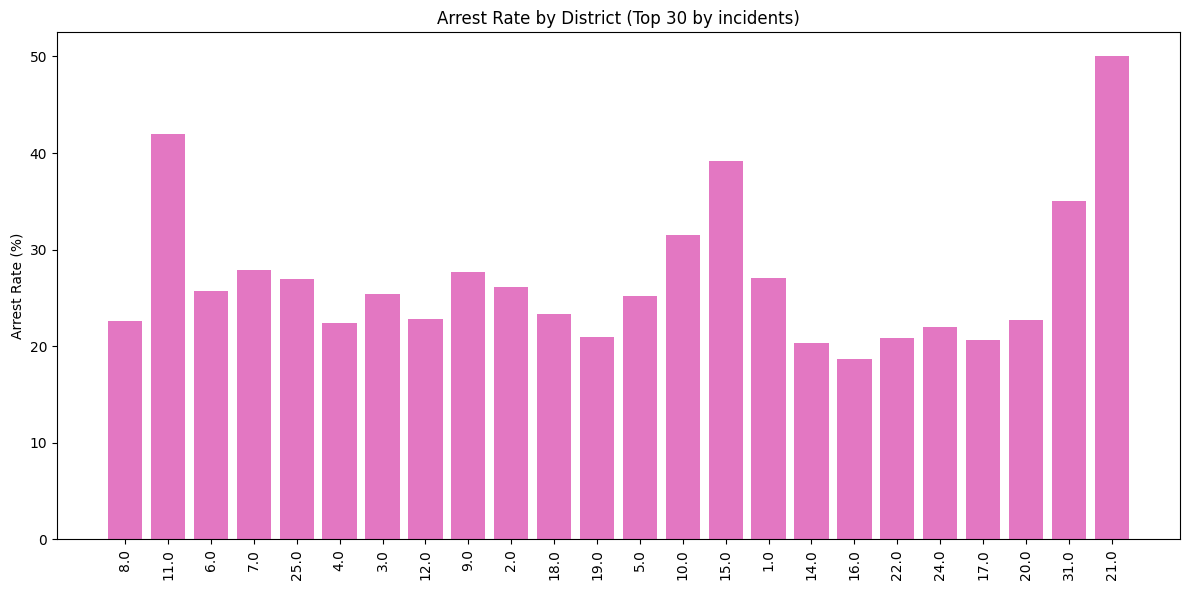

In [21]:
# Task 8: Arrest Rate by District (bar fallback)
dgrp = df.groupby('District').agg(total=('District','count'), arrested=('Arrest','sum'))
dgrp['arrest_rate'] = 100 * dgrp['arrested'] / dgrp['total']
dgrp_sorted = dgrp.sort_values('total', ascending=False).head(30)
plt.figure(figsize=(12,6))
plt.bar(dgrp_sorted.index.astype(str), dgrp_sorted['arrest_rate'], color='C6')
plt.xticks(rotation=90)
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rate by District (Top 30 by incidents)')
show()


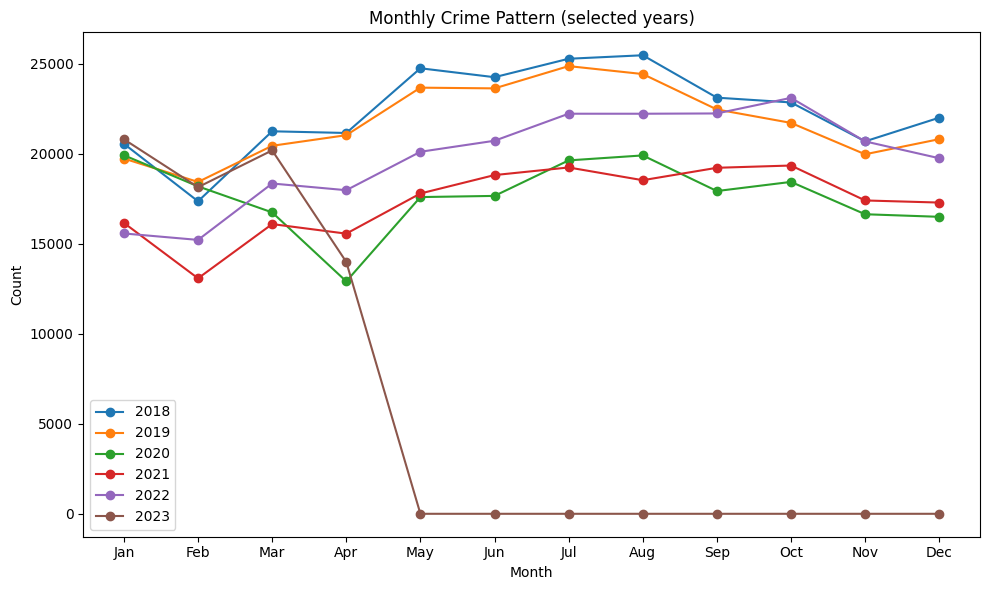

In [20]:
# Task 9: Seasonal Crime Pattern (monthly pattern overlay for recent years)
mon = df.groupby(['Year','Month']).size().reset_index(name='count')
season = mon.pivot(index='Month', columns='Year', values='count').fillna(0)
years = sorted(season.columns)
sel = years[-6:] if len(years) > 6 else years
plt.figure(figsize=(10,6))
for y in sel:
    plt.plot(season.index, season[y], marker='o', label=str(y))
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Crime Pattern (selected years)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
show()

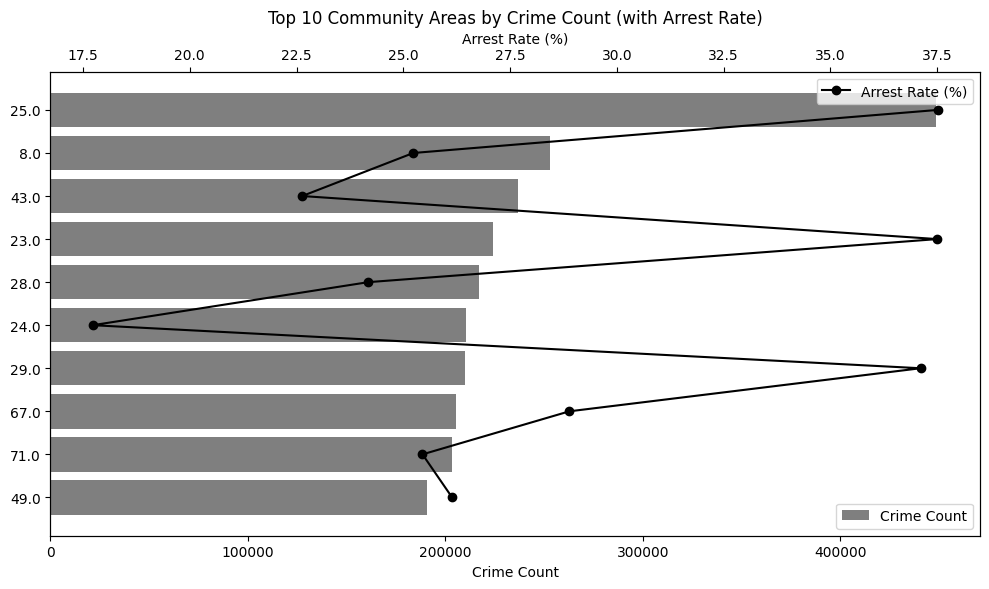

In [22]:
# Task 10: Top 10 Community Areas by Crime Count (horizontal bar + arrest rate overlay)
ca = df.groupby('Community Area').agg(total=('Community Area','count'), arrested=('Arrest','sum'))
ca['arrest_rate'] = 100 * ca['arrested'] / ca['total']
ca_top = ca.sort_values('total', ascending=False).head(10).sort_values('total')
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(ca_top.index.astype(str), ca_top['total'], color='C7', label='Crime Count')
ax.set_xlabel('Crime Count')
ax2 = ax.twiny()
ax2.plot(ca_top['arrest_rate'], ca_top.index.astype(str), 'o-', color='black', label='Arrest Rate (%)')
ax2.set_xlabel('Arrest Rate (%)')
ax.set_title('Top 10 Community Areas by Crime Count (with Arrest Rate)')
ax.legend(loc='lower right')
ax2.legend(loc='upper right')
show()